<a href="https://colab.research.google.com/github/Hemkush/NLP_Practice/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis


In [2]:
# !pip install textblob

import spacy
import pandas as pd
from textblob import TextBlob
import csv
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
nlp = spacy.load('en_core_web_sm')

file_path = "/content/sample_data/feedback_data.csv"

with open(file_path, 'r', encoding='utf-8') as file:
    feedback_data = file.readlines()

output_csv_path = "sentiment_analysis_results.csv"
csv_header = ["Feedback Index", "Sentiment Polarity", "Sentiment Subjectivity", "Named Entities", "Preferred Contact"]

with open(output_csv_path, 'w', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(csv_header)

    # Process and analyze each feedback

    for index, feedback in enumerate(feedback_data, start=1):
      print(f"\nFeedback Index: {index}")
      print("------------------")
      print(feedback.strip())

      doc = nlp(feedback)

      # Perform stentiment analysis using TextBlob
      blob = TextBlob(feedback)
      sentiment_polarity = blob.sentiment.polarity
      sentiment_subjectivity = blob.sentiment.subjectivity
      print(f"Sentiment Polarity: {sentiment_polarity} (Polarity), Sentiment Subjectivity: {sentiment_subjectivity}")

      # extract named entity
      entities = [(ent.text, ent.label_) for ent in doc.ents]
      print("Named Entities:", entities)

      # Determine preferred contact method
      preferred_contact = "chat" if "email" not in feedback.lower() else "email"
      print(f"Preferred Contact Method: {preferred_contact}")

      #write result to the csv file
      csv_writer.writerow([index, sentiment_polarity, sentiment_subjectivity, entities, preferred_contact])


Feedback Index: 1
------------------
Your products are excellent. I really love the quality! However, delivery to my location in Los Angeles was a bit slow. abbey@email.com
Sentiment Polarity: 0.44166666666666665 (Polarity), Sentiment Subjectivity: 0.6666666666666666
Named Entities: [('Los Angeles', 'GPE')]
Preferred Contact Method: email

Feedback Index: 2
------------------
The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Polarity: 0.13636363636363635 (Polarity), Sentiment Subjectivity: 0.45454545454545453
Named Entities: [('New York', 'GPE')]
Preferred Contact Method: email

Feedback Index: 3
------------------
The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Polarity: 0.48409090909090907 (Polarity), Sentiment Subjectivity: 0.7511363636363636
Named Entities: [('San Francisco', 'GPE')]
Preferred Contact Method: chat

Feedback 

In [8]:
df = pd.read_csv("/content/sentiment_analysis_results.csv")
df.head()

,Feedback Index,Sentiment Polarity,Sentiment Subjectivity,Named Entities,Preferred Contact
0,1,0.441667,0.666667,"[('Los Angeles', 'GPE')]",email
1,2,0.136364,0.454545,"[('New York', 'GPE')]",email
2,3,0.484091,0.751136,"[('San Francisco', 'GPE')]",chat
3,4,-0.750000,0.750000,"[('Chicago', 'GPE')]",email


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Feedback Index          4 non-null      int64  
 1   Sentiment Polarity      4 non-null      float64
 2   Sentiment Subjectivity  4 non-null      float64
 3   Named Entities          4 non-null      object 
 4   Preferred Contact       4 non-null      object 
dtypes: float64(2), int64(1), object(2)
memory usage: 292.0+ bytes


# Plot the Preferred contact method


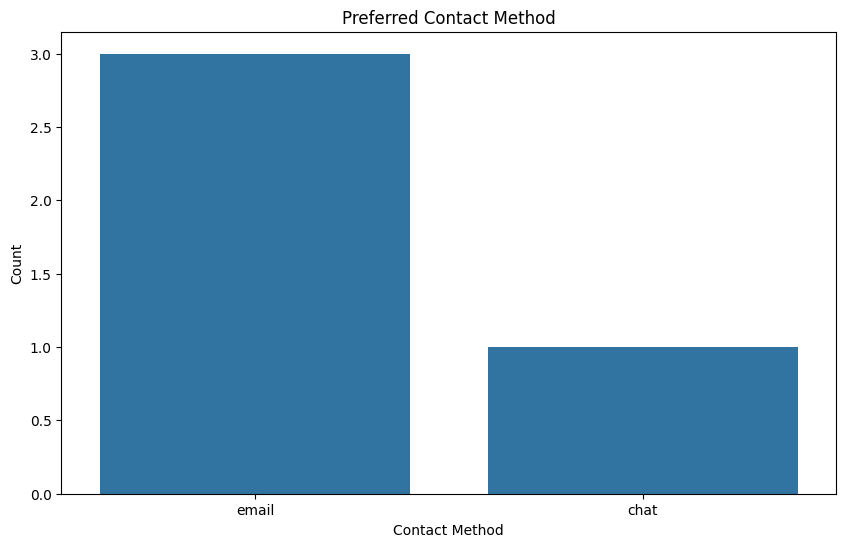

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preferred Contact')
plt.title('Preferred Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

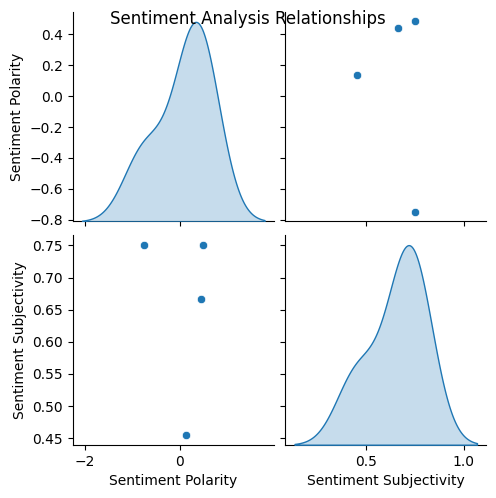

In [15]:
#pair plot: Pairplot relationships
sns.pairplot(data=df, vars=['Sentiment Polarity', 'Sentiment Subjectivity'], diag_kind='kde')
plt.suptitle('Sentiment Analysis Relationships')
plt.show()